#Interpolation: machine learning because the computer has to know how to predict the value of a function
#•parametric: I optimize the parameters of my model in order to interpolate
#•non-parametric: there are possibly millions of parameters

#•Nearest neighbours interpolation: the most simple example of interpolation

#•Linear interpolation: straight line between (discrete) points, and the values of the slope and of the intercept vary from point to point
#if there are two points where the first derivative of the function phi is zero, there must be a point in between them where the second derivative is zero -> the error that I make when I interpolate the function g is proportional to the second derivative of the function f and to the square of the interval (so it depends on the sampling)

#•Spline interpolation: in every interval/bin I use cubic functions, moreover I have to impose 4n conditions
#the error is proportional to the fourth derivative of the function
#it does not suffer from interpolation in the edges

#(The previous methods can be extended to many dimensions)

#•Multi-dimensional interpolation: non-parametric methods

#NEURAL NETWORKS: linear combination of my pieces of information /my parameters (ex. values of z,OmegaM,OmegaR) to obtain an activation function -> the Loss Function evaluates the error that the process is making (/it measures the difference between the network's predictions and the actual target values)
#Dc(z,OmegaM,OmegaR,w_0,w_a,H0,...)
#P(k,...) power spectrum

In [42]:
import sys
sys.path.append("../../")

import math as m
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

from pyACC.cosmology import Dc

Dimensione di z: 20
Dimensione di Dc_z: 20
Dimensione di z_new: 20
Dimensione di Dc_new: 20
Dimensione di Dc_int: 20
0.0
5.684341886080802e-14
1.1368683772161603e-13
2.2737367544323206e-13
0.0
0.0
4.547473508864641e-13
4.547473508864641e-13
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


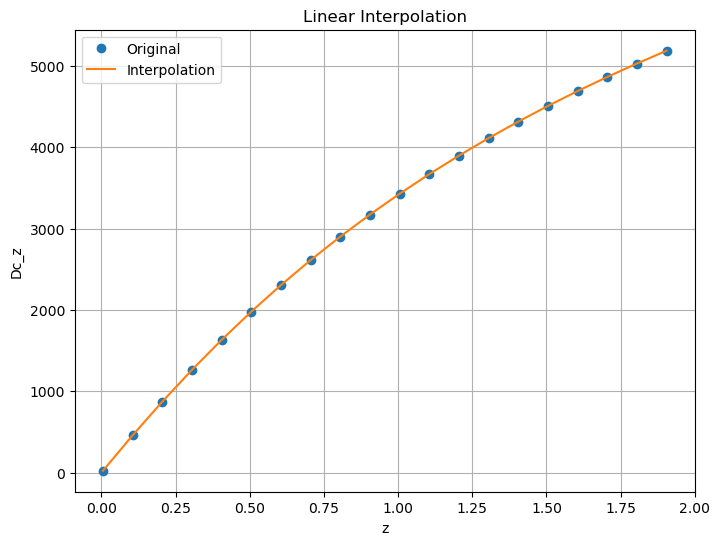

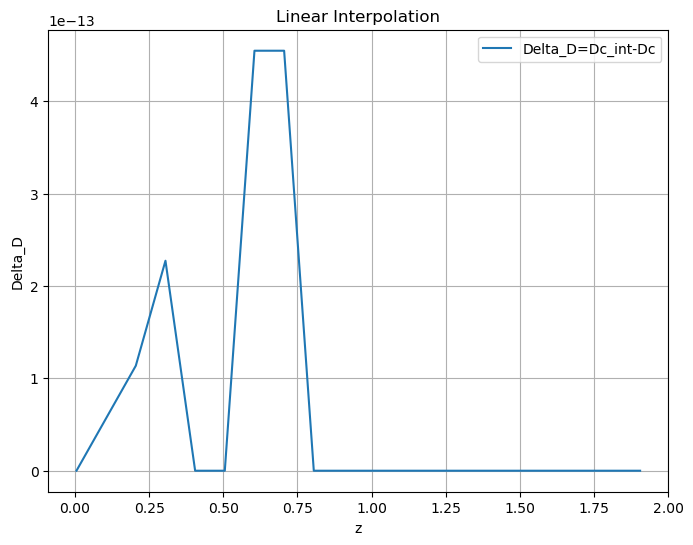

In [43]:
#now I take the data from comoving_distances.txt
file='/Users/marigalla/AstroCosmoComputational/Students/MariaLuisaGallavotti/Lesson2/Exercise3/comoving_distances.txt'
all=np.loadtxt(file,delimiter='\t',usecols=(0,1),unpack=True)
z,Dc_z=all[:,::10]
z_new=np.arange(0,2-0.01,0.1)+0.01/2 #number of components=number of lines read in file
#z_new = np.linspace(min(z), max(z), 20)

def hubble_function(z_new,OmegaM,OmegaR,w,H0):
    return H0*m.sqrt(OmegaM*(1+z_new)**3+OmegaR*(1+z_new)**4+(1-OmegaM-OmegaR)*(1+z_new)**(3*(1+w)))
OmegaM=0.319
OmegaR=0
w=-1
H0=67
Dc_new=[]
for i in range(0,len(z_new)):
    Dc_new.append(Dc(hubble_function,z_new[i],OmegaM,OmegaR,w,H0))
    #print(Dc_new[i])

f=interp1d(z_new,Dc_new,kind='linear')
Dc_int=f(z)
#f=interp1d(z,Dc_z,kind='linear') 
#Dc_int=f(z_new)
    
print("Dimensione di z:", len(z))
print("Dimensione di Dc_z:", len(Dc_z))
print("Dimensione di z_new:", len(z_new))
print("Dimensione di Dc_new:", len(Dc_new))
print("Dimensione di Dc_int:", len(Dc_int))

#'''
'''
for i in range(0,len(z_new)):
    print(Dc_new[i],Dc_int[i])
'''
for i in range(0,len(z_new)):
    print(Dc_new[i]-Dc_int[i])

Delta_D=[]
for i in range (0,len(Dc_z)):
    Delta_D.append(Dc_new[i]-Dc_int[i])



plt.figure(figsize=(8, 6))
plt.plot(z, Dc_z, 'o', label='Original')
plt.plot(z, Dc_int, '-', label='Interpolation')
plt.xlabel('z')
plt.ylabel('Dc_z')
plt.title('Linear Interpolation')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(z, Delta_D, '-', label='Delta_D=Dc_int-Dc')
plt.xlabel('z')
plt.ylabel('Delta_D')
plt.title('Linear Interpolation')
plt.legend()
plt.grid(True)
plt.show()
#'''